In [1]:
library(tidyverse)
library(ggrepel)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(repr)

In [3]:
dat <- read.csv('coarse_grain_cell_types_obs.csv')

In [4]:
names(dat)

[1] "X"                      "samplename"             "n_genes"               
 [4] "n_molecules"            "doublet_score"          "percent_mito"          
 [7] "leiden"                 "louvain"                "diagnosis"             
[10] "phase"                  "sample_diagnosis"       "patient"               
[13] "treatment"              "procedure"              "hcl_refined"           
[16] "hcl_celltype"           "hcl_score"              "CLid"                  
[19] "CL_name"                "nobatch_leiden"         "nobatch_louvain"       
[22] "cnv_avg"                "has_cnv"                "coarse_grain_celltypes"

In [5]:
#R
cellclusters = c(
    gi_epithelial=c('0','3','4','6','8','13','19','20','28','31','33','34','35','36','38','39','40'), # 78049 cells, # 32 is heptoid
    squamous_epithelial=c('16','18','21'),
    fibroblasts=c('7'),
    myofibroblasts=c('12'),
    endothelial=c('15','5', '30', '26'),
    neuroendocrine=c('17'),
    parietal=c('29'),
    #stromal=c('7','12','15','5', '30', '26'),
    neutrophils=c('22'),
    monocytes_macs_DCs=c('10'),  # and macs and dcs
    B_cells=c('11','23'),
    cd4_Tcells=c('2'),
    cd8_Tcells=c('1','25'),
    NK_cells=c('14'),
    mast_cells=c('9'),
    hepatoid=c('27'),
    naive_T_cells=c('24')
)


Joining, by = "samplename"


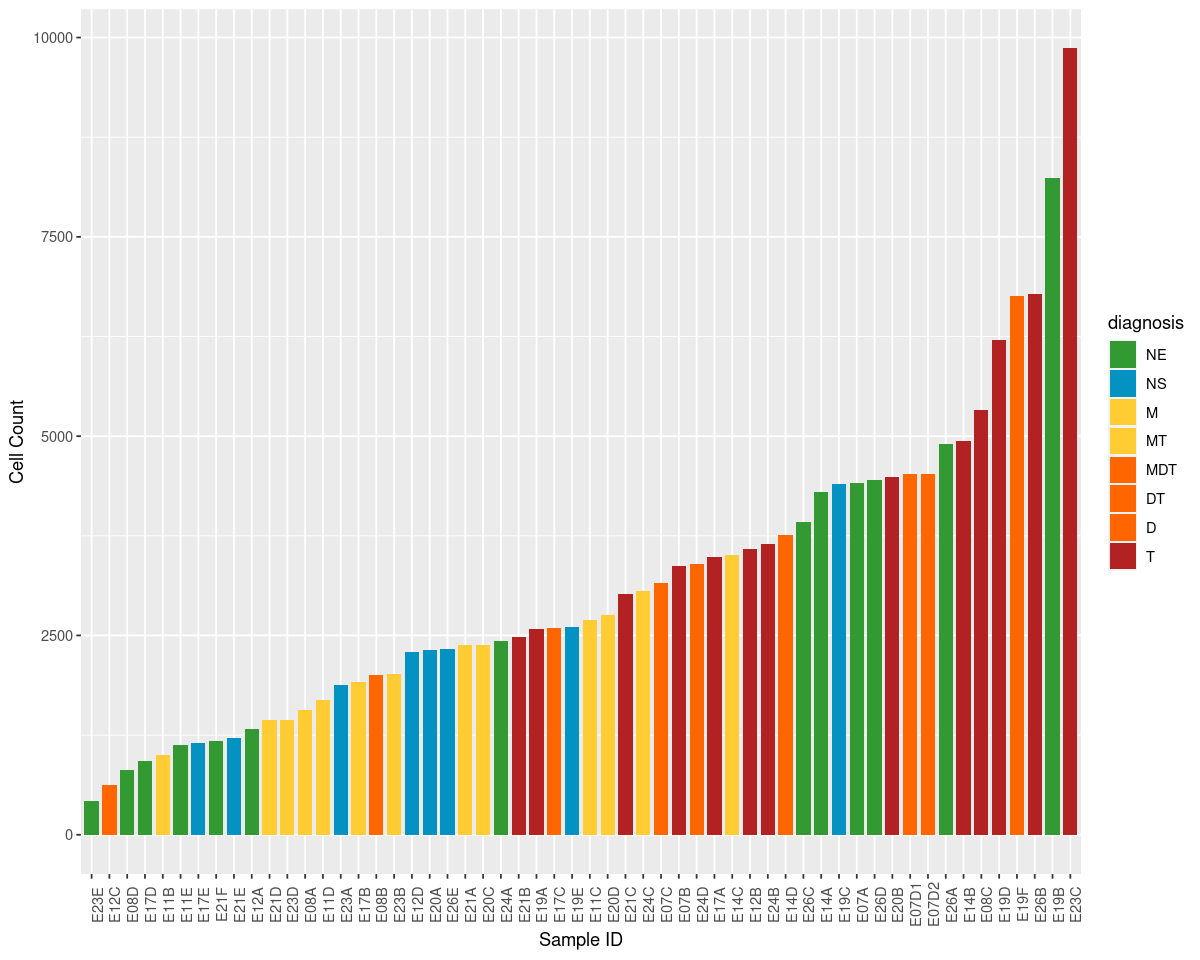

In [6]:

# How many cells per sample?

sample_name_table <- table(dat$samplename)

sample_name_df <- data.frame(sample_name_table)
colnames(sample_name_df) <- c('samplename', 'cellcount')

sample_name_df <- dplyr::inner_join(sample_name_df, unique(dat[,c('samplename', 'diagnosis')]))

options(repr.plot.width=10, repr.plot.height=8)
ggplot(data = sample_name_df) +
    geom_bar(mapping = aes(x=reorder(samplename, cellcount), y=cellcount, fill=diagnosis), stat="identity", width=0.8) +
    theme(axis.text.x = element_text(angle = 90)) + 
    xlab('Sample ID') + ylab('Cell Count') +
    scale_fill_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 


In [7]:

# how many samples are there?

length(sample_name_table)


[1] 56

In [12]:
sort(table(dat$coarse_grain_celltypes))


                 __            parietal            hepatoid       naive_T_cells 
                237                 390                 762                1032 
        neutrophils      neuroendocrine            NK_cells      myofibroblasts 
               1378                2630                3571                4473 
 monocytes_macs_DCs             B_cells squamous_epithelial          mast_cells 
               5058                5831                6098                7414 
        fibroblasts          cd4_Tcells          cd8_Tcells         endothelial 
               9514               14314               17176               17702 
      gi_epithelial 
              78006 

In [8]:
table(dat$leiden)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
22748 16276 14314 13106 13053 13042 12140  9514  8274  7414  5058  4721  4473 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 3750  3571  3446  2904  2630  1770  1747  1703  1424  1378  1110  1032   900 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
  868   762   604   390   346   222   181   170   154   123   119    56    39 
   39    40 
   39    15 

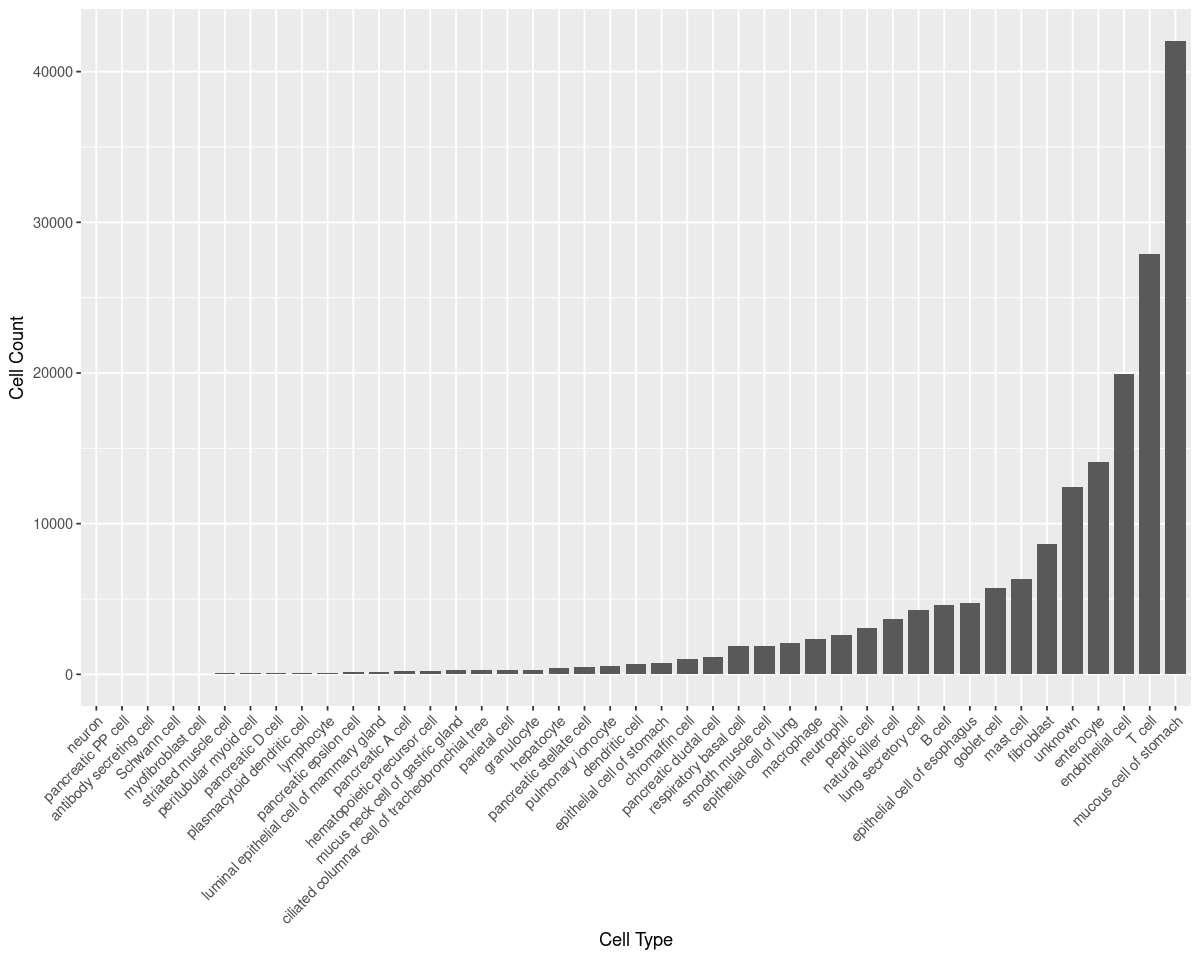

In [8]:


cell_type_table <- table(dat$CL_name)

cell_type_df <- data.frame(cell_type_table)
colnames(cell_type_df) <- c('celltype', 'cellcount')

options(repr.plot.width=10, repr.plot.height=8)
ggplot(data = cell_type_df) +
    geom_bar(mapping = aes(x=reorder(celltype, cellcount), y=cellcount), stat="identity", width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Cell Type') + ylab('Cell Count') 


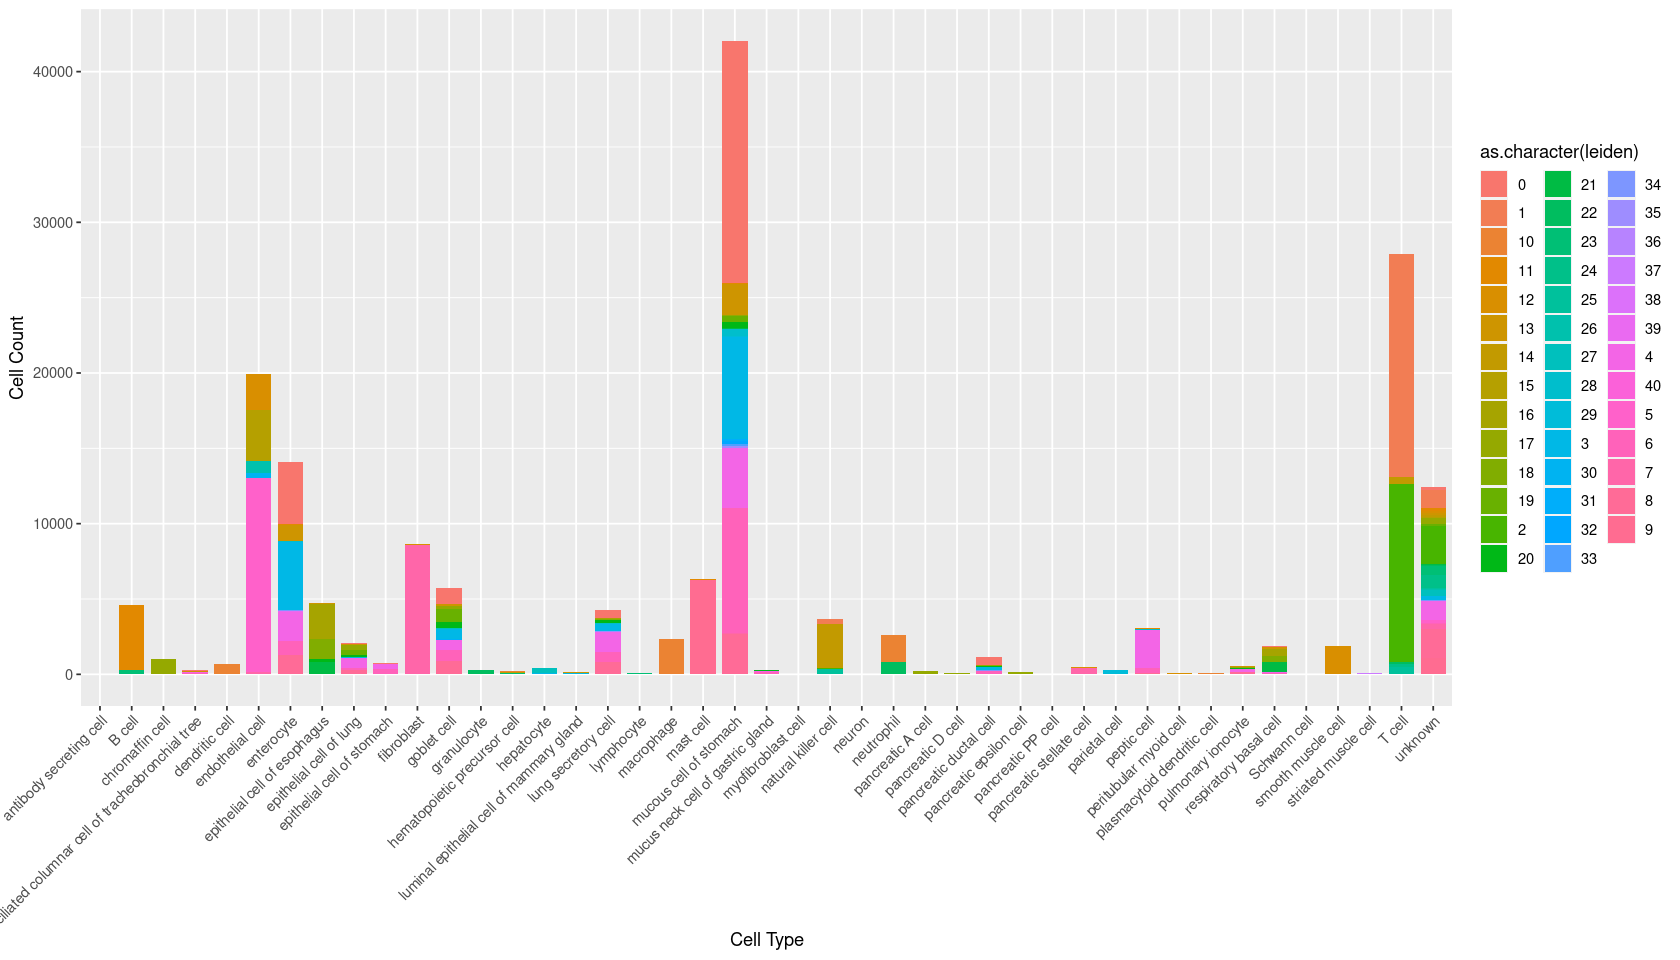

In [197]:



options(repr.plot.width=14, repr.plot.height=8)
ggplot(data = dat) +
    geom_bar(mapping = aes(x=CL_name, fill=as.character(leiden)),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Cell Type') + ylab('Cell Count') 


In [15]:
df <- data.frame()

for (ci in unique(dat$coarse_grain_celltypes)) {
    print(ci)
}


[1] "NKcells"
[1] "cd8_Tcells"
[1] "epithelial"
[1] "cd4_Tcells"
[1] "mastcells"
[1] "endothelial"
[1] "myofibroblasts"
[1] "parietal"
[1] "fibroblasts"
[1] "neutrophils"
[1] "__"
[1] "monocytes_macs_DCs"
[1] "neuroendocrine"
[1] "Bcells"
[1] "squamous"


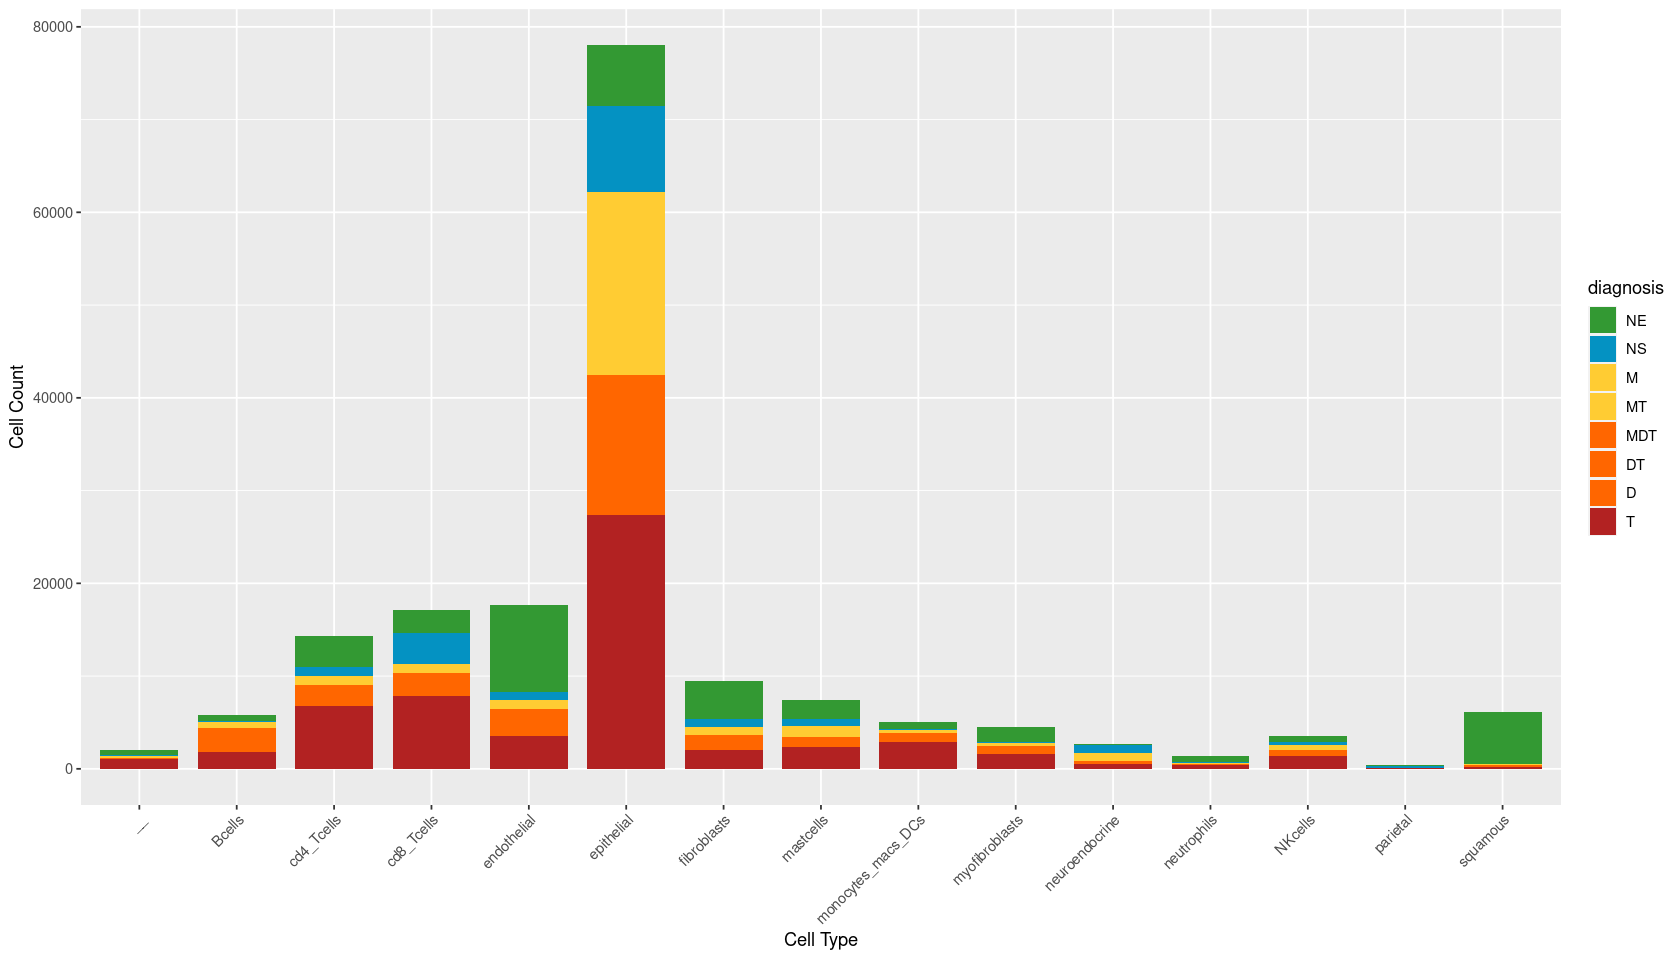

In [19]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
ggplot(data = dat) +
    geom_bar(mapping = aes(x=coarse_grain_celltypes, fill=diagnosis),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Cell Type') + ylab('Cell Count') +
    scale_fill_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 


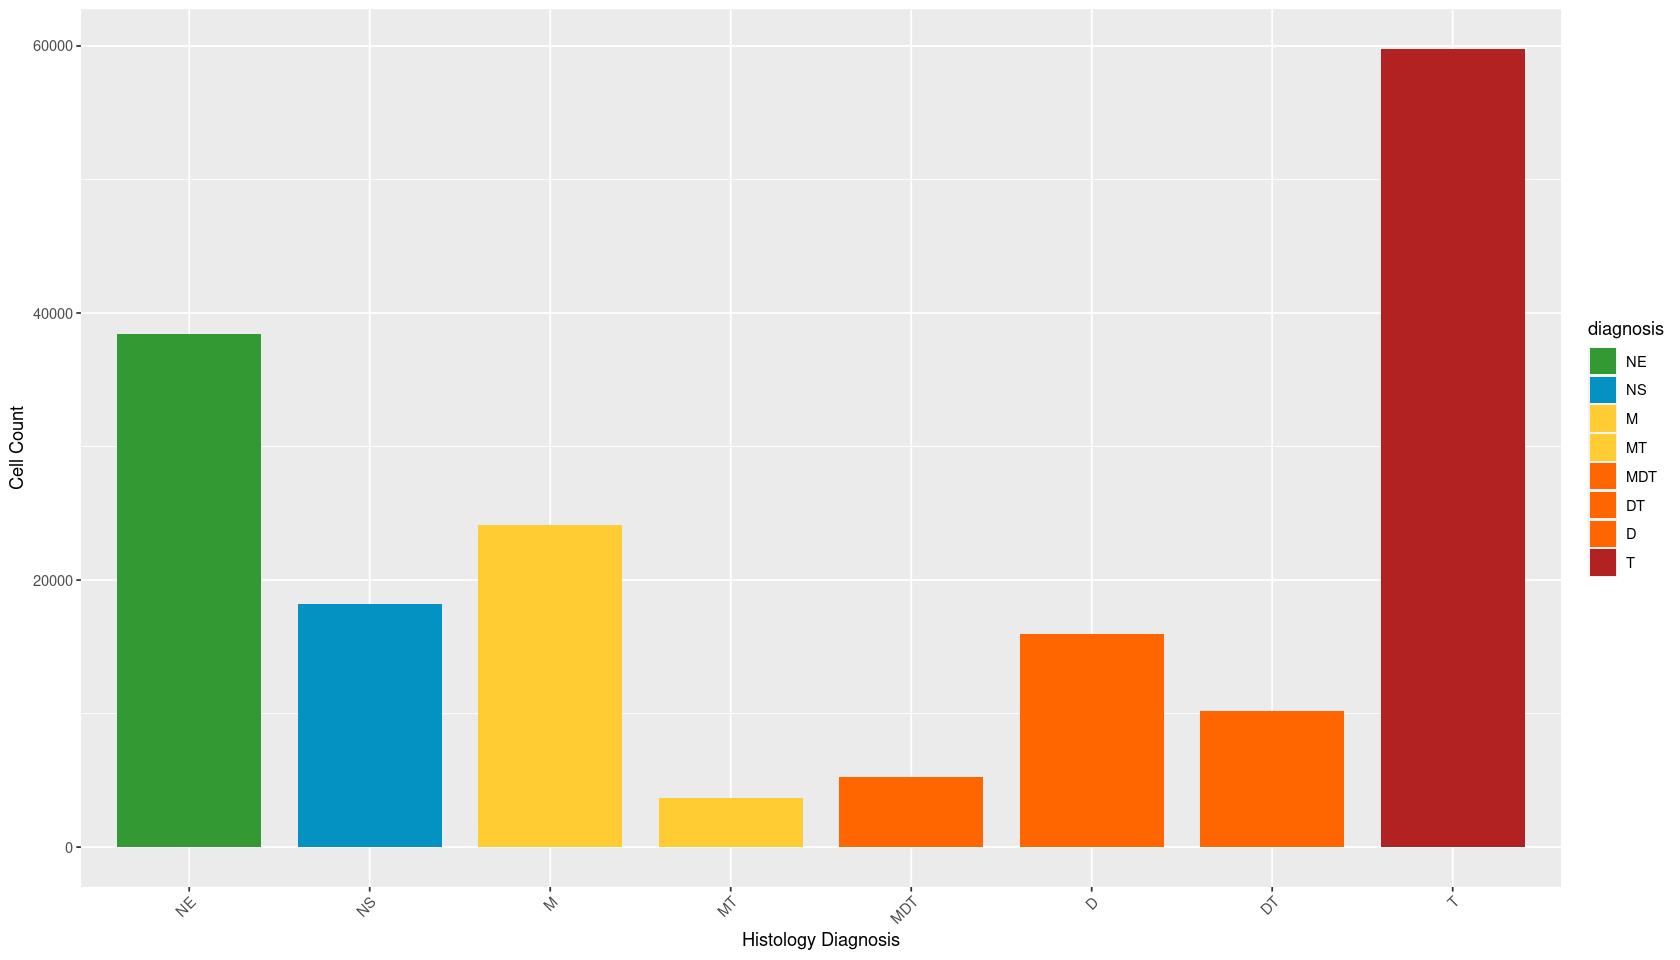

In [14]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
ggplot(data = dat) +
    geom_bar(mapping = aes(x=diagnosis, fill=diagnosis),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Histology Diagnosis') + ylab('Cell Count') +
    scale_fill_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NE NS M MT MDT DT D T
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: grey50
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train:

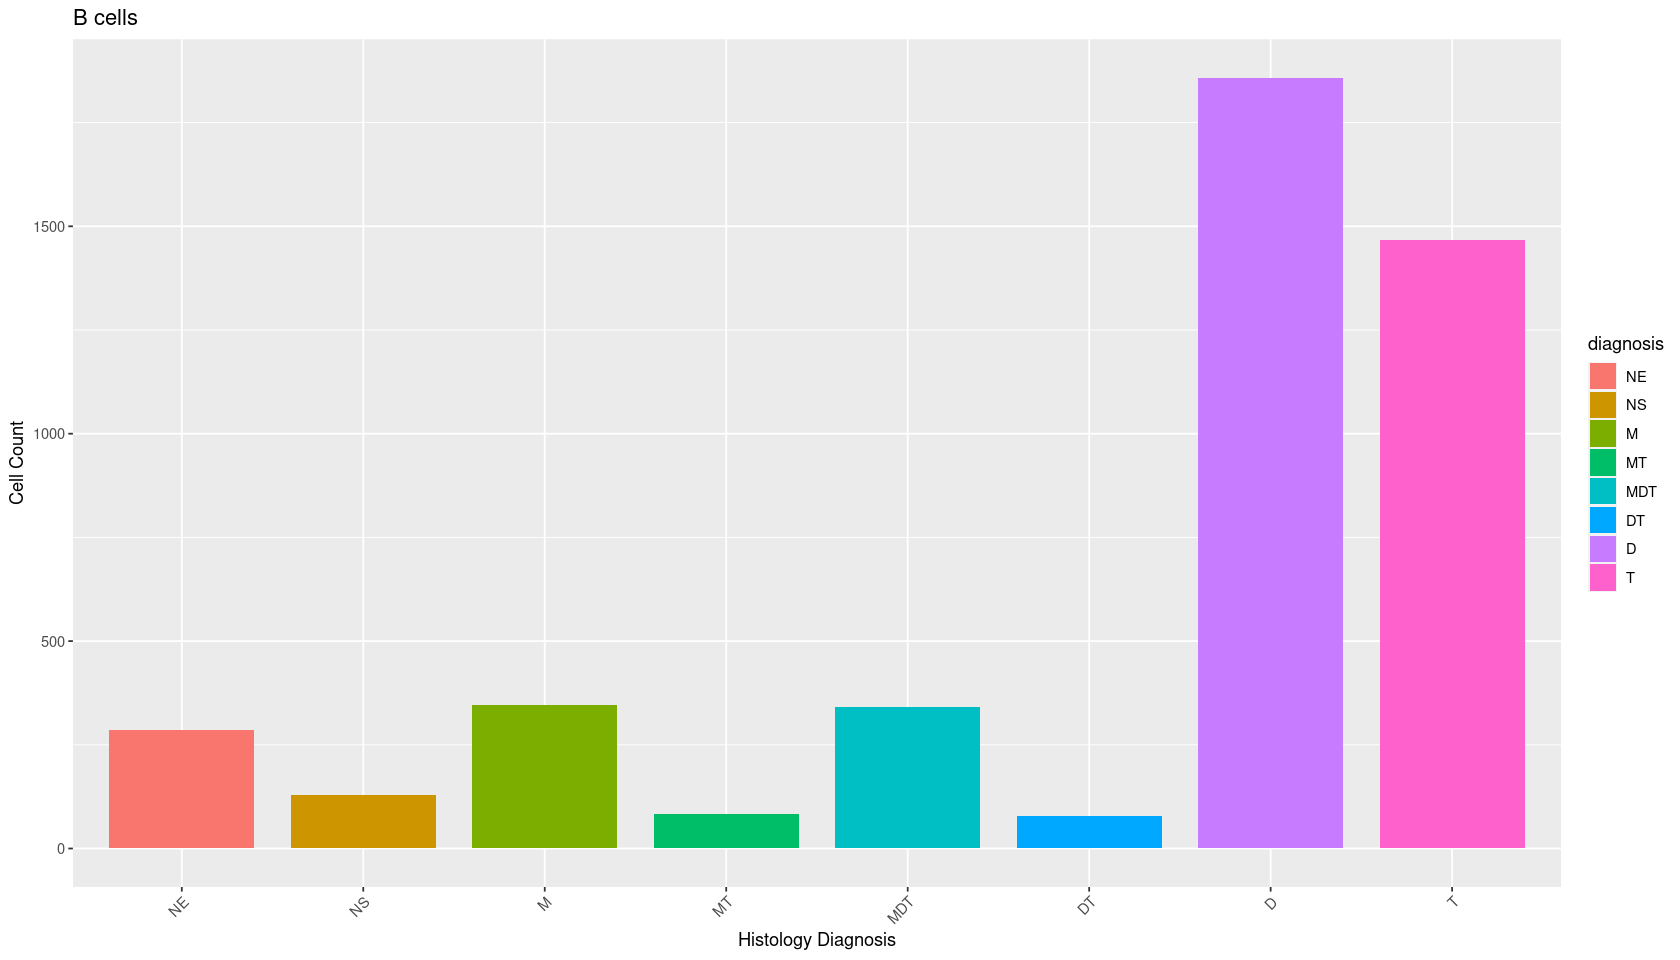

In [13]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','DT','D','T'))
ggplot(data = dat %>% dplyr::filter(CL_name == 'B cell')) +
    geom_bar(mapping = aes(x=diagnosis, fill=diagnosis),  width=0.8) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Histology Diagnosis') + ylab('Cell Count') + labs(title='B cells')
    scale_fill_manual(values = c("NE" = "#006633",
                                  "NS" = "#339933",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 



In [22]:
table(dat[,'diagnosis'])


   NE    NS     M    MT   MDT     D    DT     T 
38447 18199 24128  3691  5223 15972 10157 59769 

In [27]:
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
cellcnts <- data.frame(table(dat[,c('diagnosis','coarse_grain_celltypes')]))
head(cellcnts)
normCellCnts <- cellcnts %>% group_by(coarse_grain_celltypes) %>% mutate(freqSum = sum(Freq)) %>% mutate(percentOfDx= 100* (Freq / freqSum) )

,diagnosis,coarse_grain_celltypes,Freq
,<fct>,<fct>,<int>
1,NE,__,56
2,NS,__,0
3,M,__,1
4,MT,__,43
5,MDT,__,0
6,D,__,0


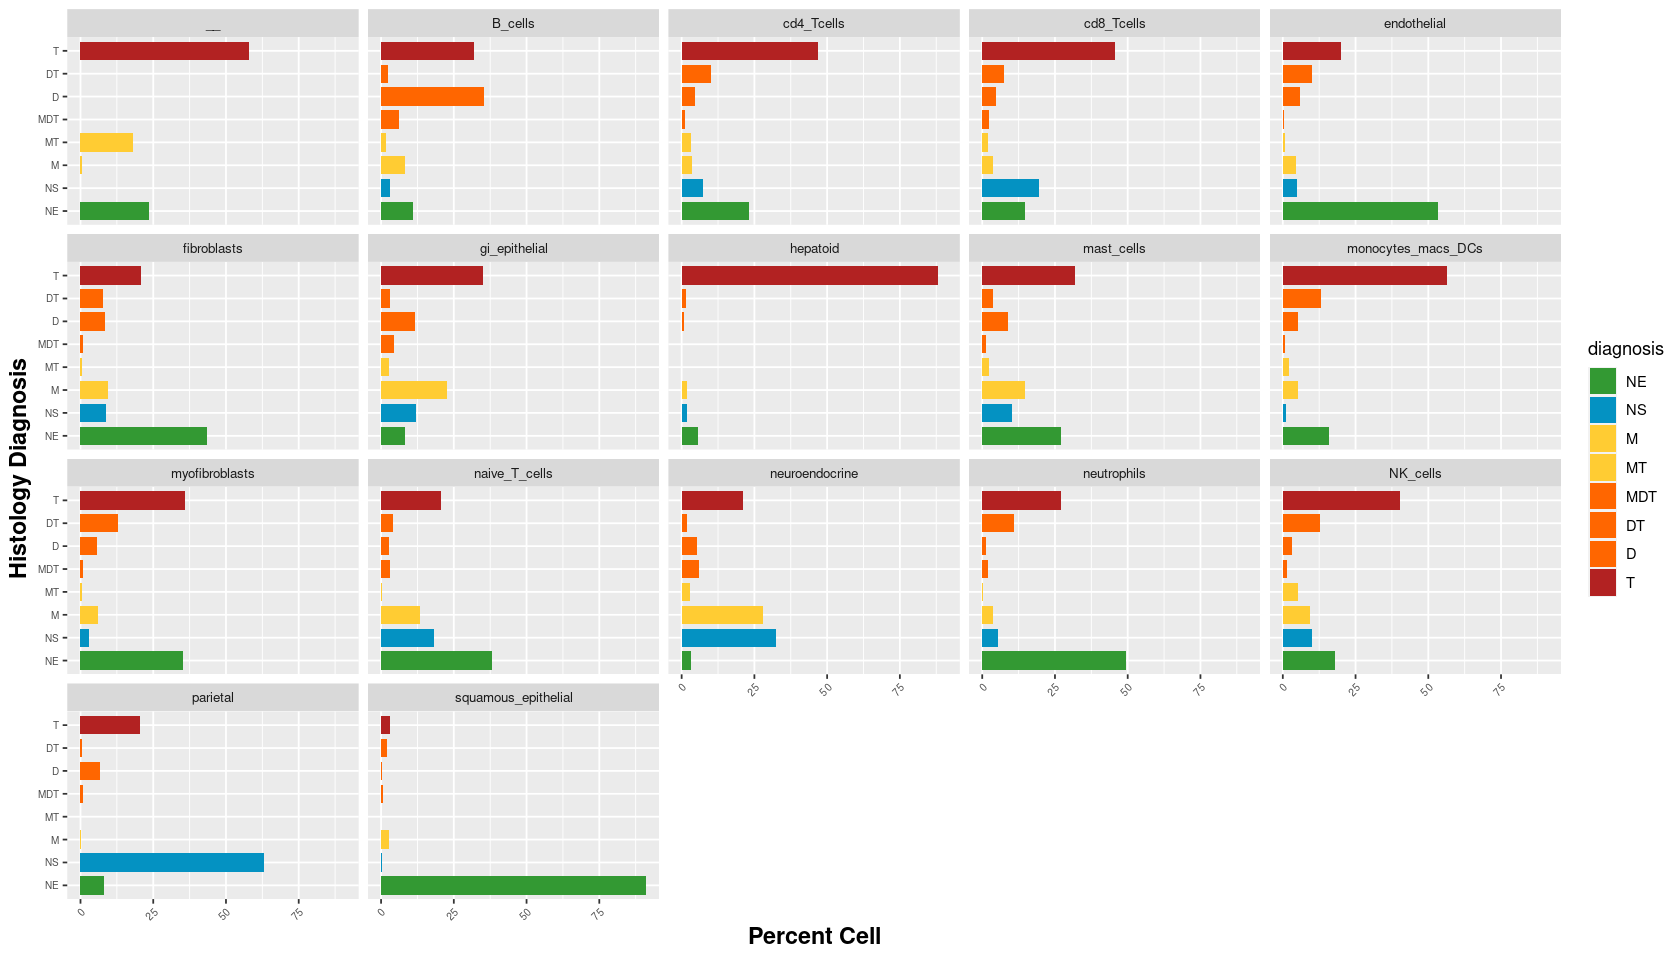

In [28]:

options(repr.plot.width=14, repr.plot.height=8)
dat$diagnosis <- factor(dat$diagnosis, levels = c('NE','NS','M','MT','MDT','D','DT','T'))
ggplot(data = normCellCnts) +
    geom_bar(mapping = aes(x=percentOfDx, y=diagnosis, fill=diagnosis),  width=0.8, stat="identity") +
    scale_fill_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) +
    facet_wrap(~coarse_grain_celltypes) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    ylab('Histology Diagnosis') + xlab('Percent Cell') +
    theme(axis.text=element_text(size=6),
          axis.title=element_text(size=14,face="bold"),
         strip.text.x = element_text(size = 8))
      



patient,coarse_grain_celltypes,Freq,freqSum,percentOfPatient
<fct>,<fct>,<int>,<int>,<dbl>
E07,__,0,19989,0.000000000
E08,__,0,9697,0.000000000
E11,__,43,6509,0.660623752
E12,__,0,7834,0.000000000
E14,__,1,16518,0.006054002
E17,__,105,10061,1.043633834


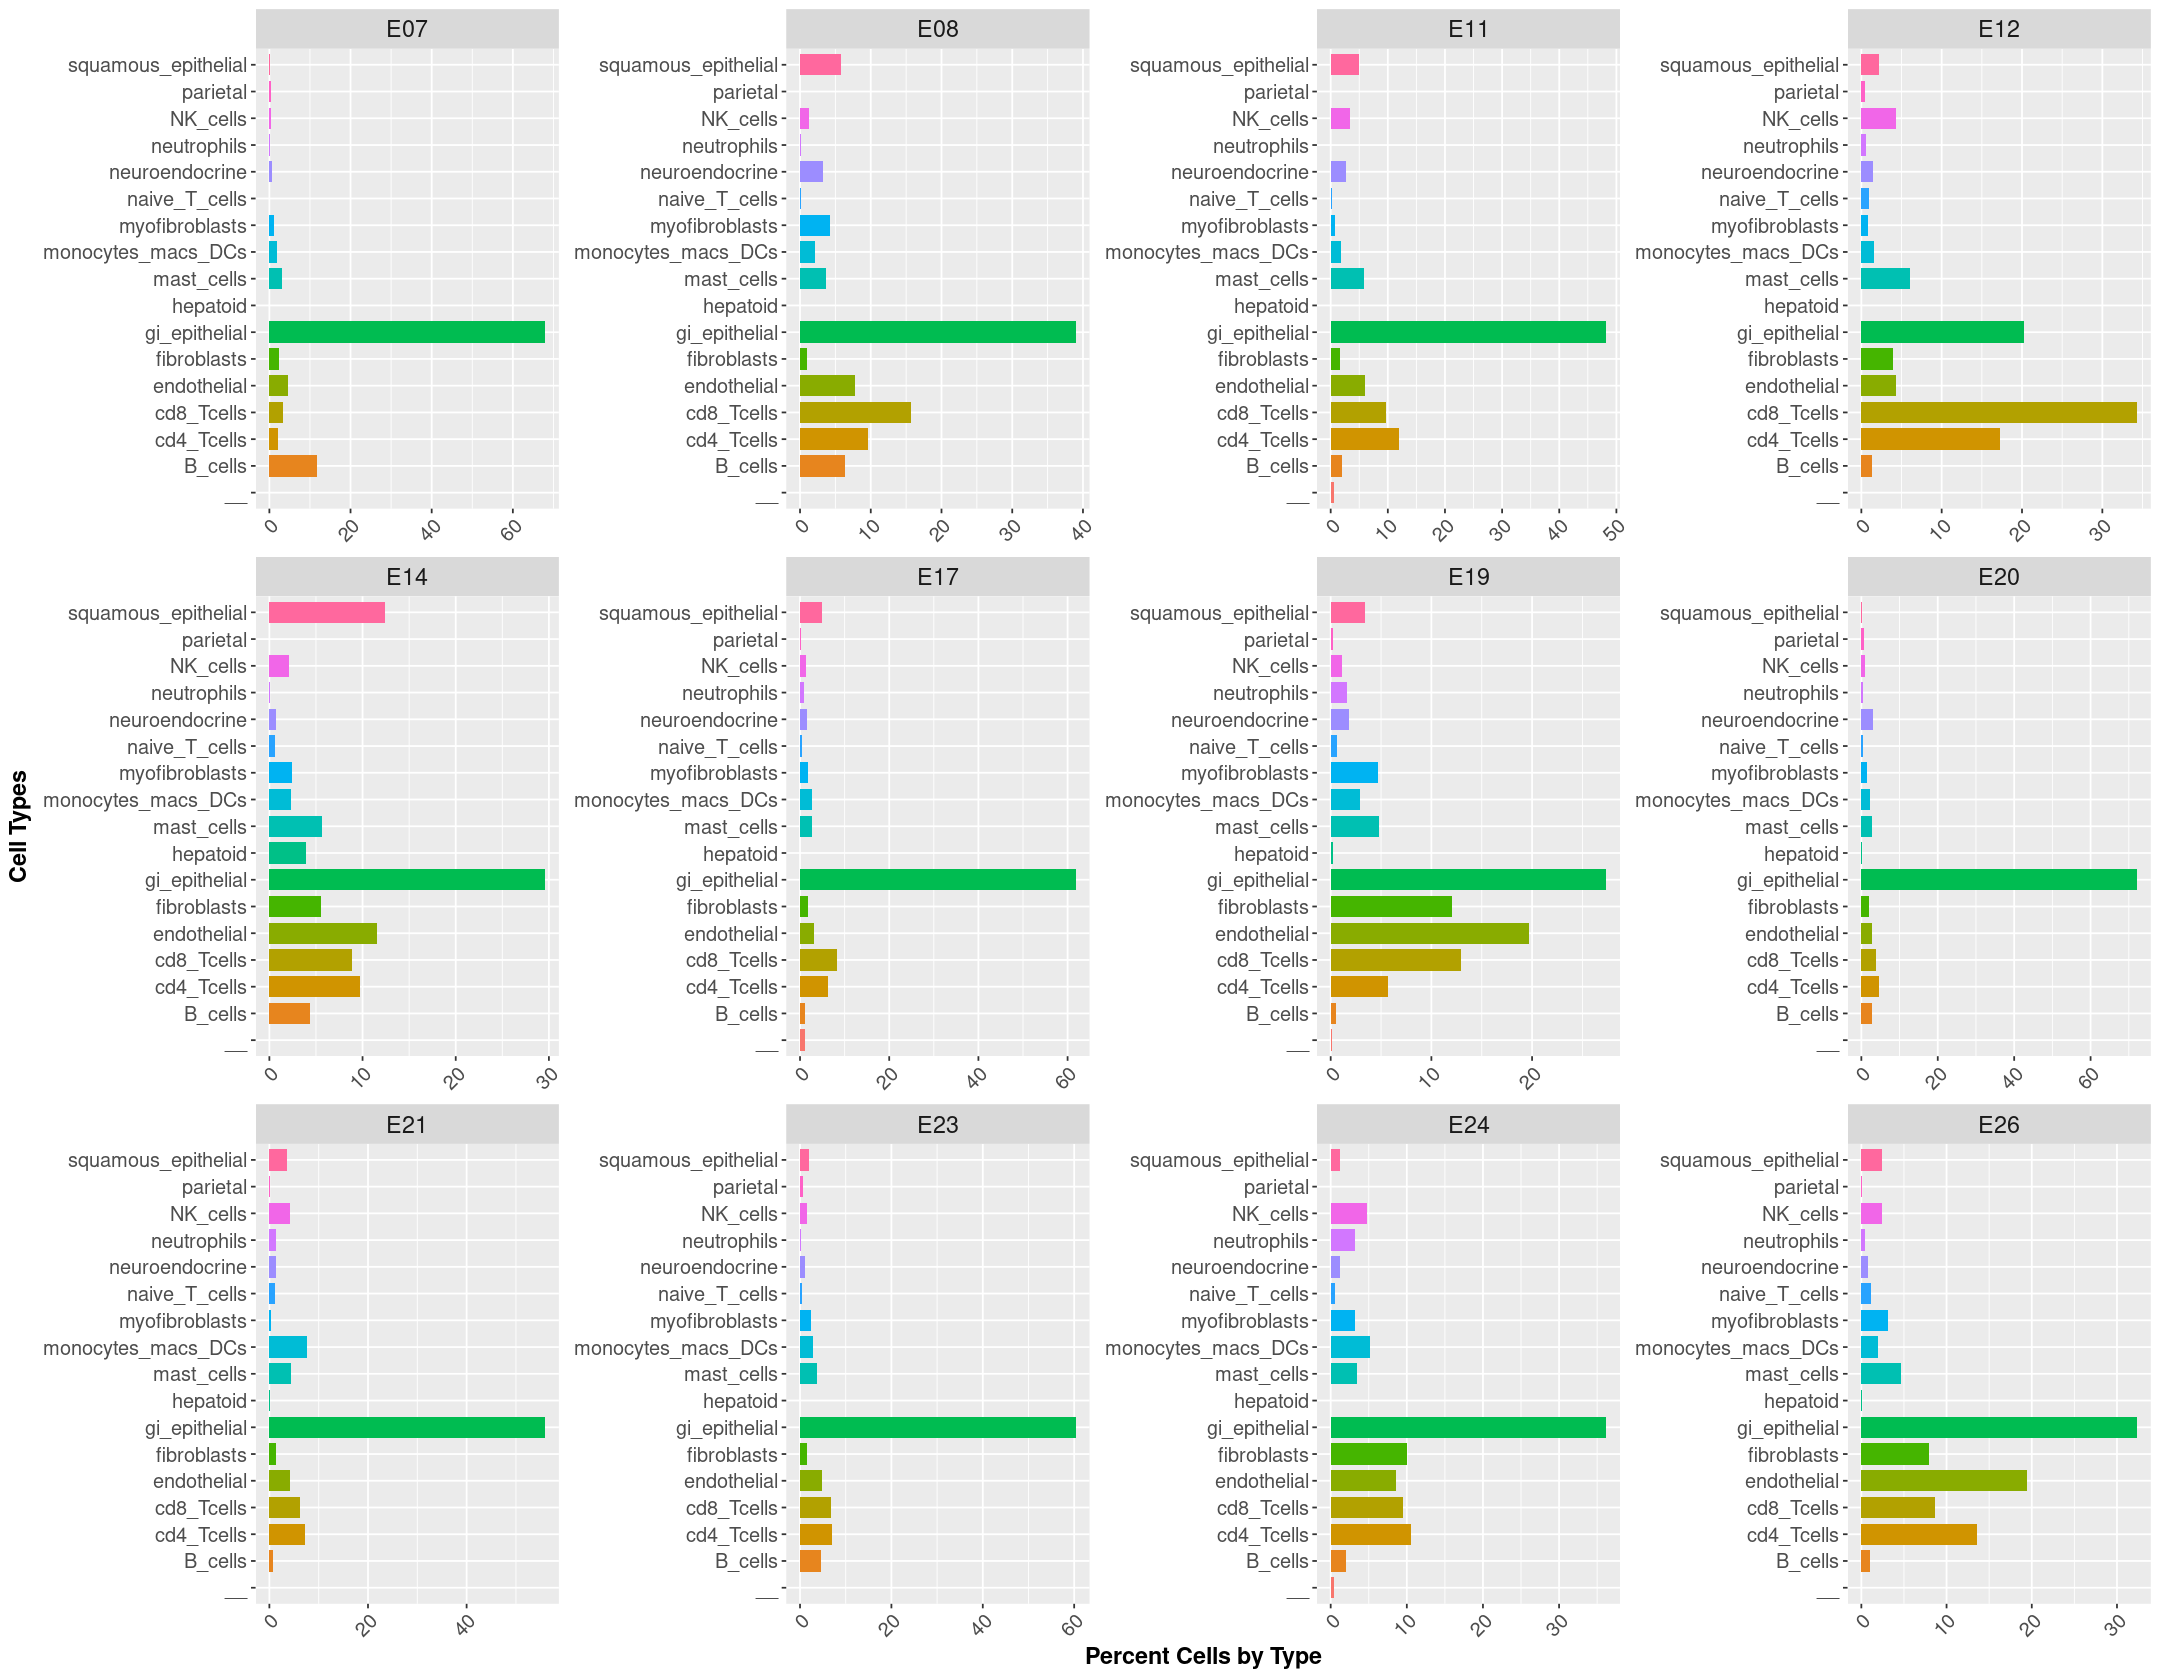

In [29]:
options(repr.plot.width=18, repr.plot.height=14)

cellcnts <- data.frame(table(dat[,c('patient','coarse_grain_celltypes')]))
normCellCntsByPatient <- cellcnts %>% group_by(patient) %>% mutate(freqSum = sum(Freq)) %>% mutate( percentOfPatient= 100* (Freq / freqSum) )
head(normCellCntsByPatient)

ggplot(data = normCellCntsByPatient) +
    geom_bar(mapping = aes(x=percentOfPatient, y=coarse_grain_celltypes, fill=coarse_grain_celltypes),  width=0.8, stat="identity") +
    facet_wrap(~patient,scales = "free") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Percent Cells by Type') + ylab('Cell Types') +
    theme(axis.text=element_text(size=12),
          axis.title=element_text(size=14,face="bold"),
          strip.text.x = element_text(size = 14),
          legend.position="none")
      


patient,coarse_grain_celltypes,Freq,freqSum,percentOfPatient
<fct>,<fct>,<int>,<int>,<dbl>
E12,__,7,2288,0.3059441
E17,__,9,1153,0.7805724
E19,__,108,7012,1.5402168
E20,__,27,2319,1.1642950
E21,__,24,1217,1.9720624
E23,__,15,1880,0.7978723


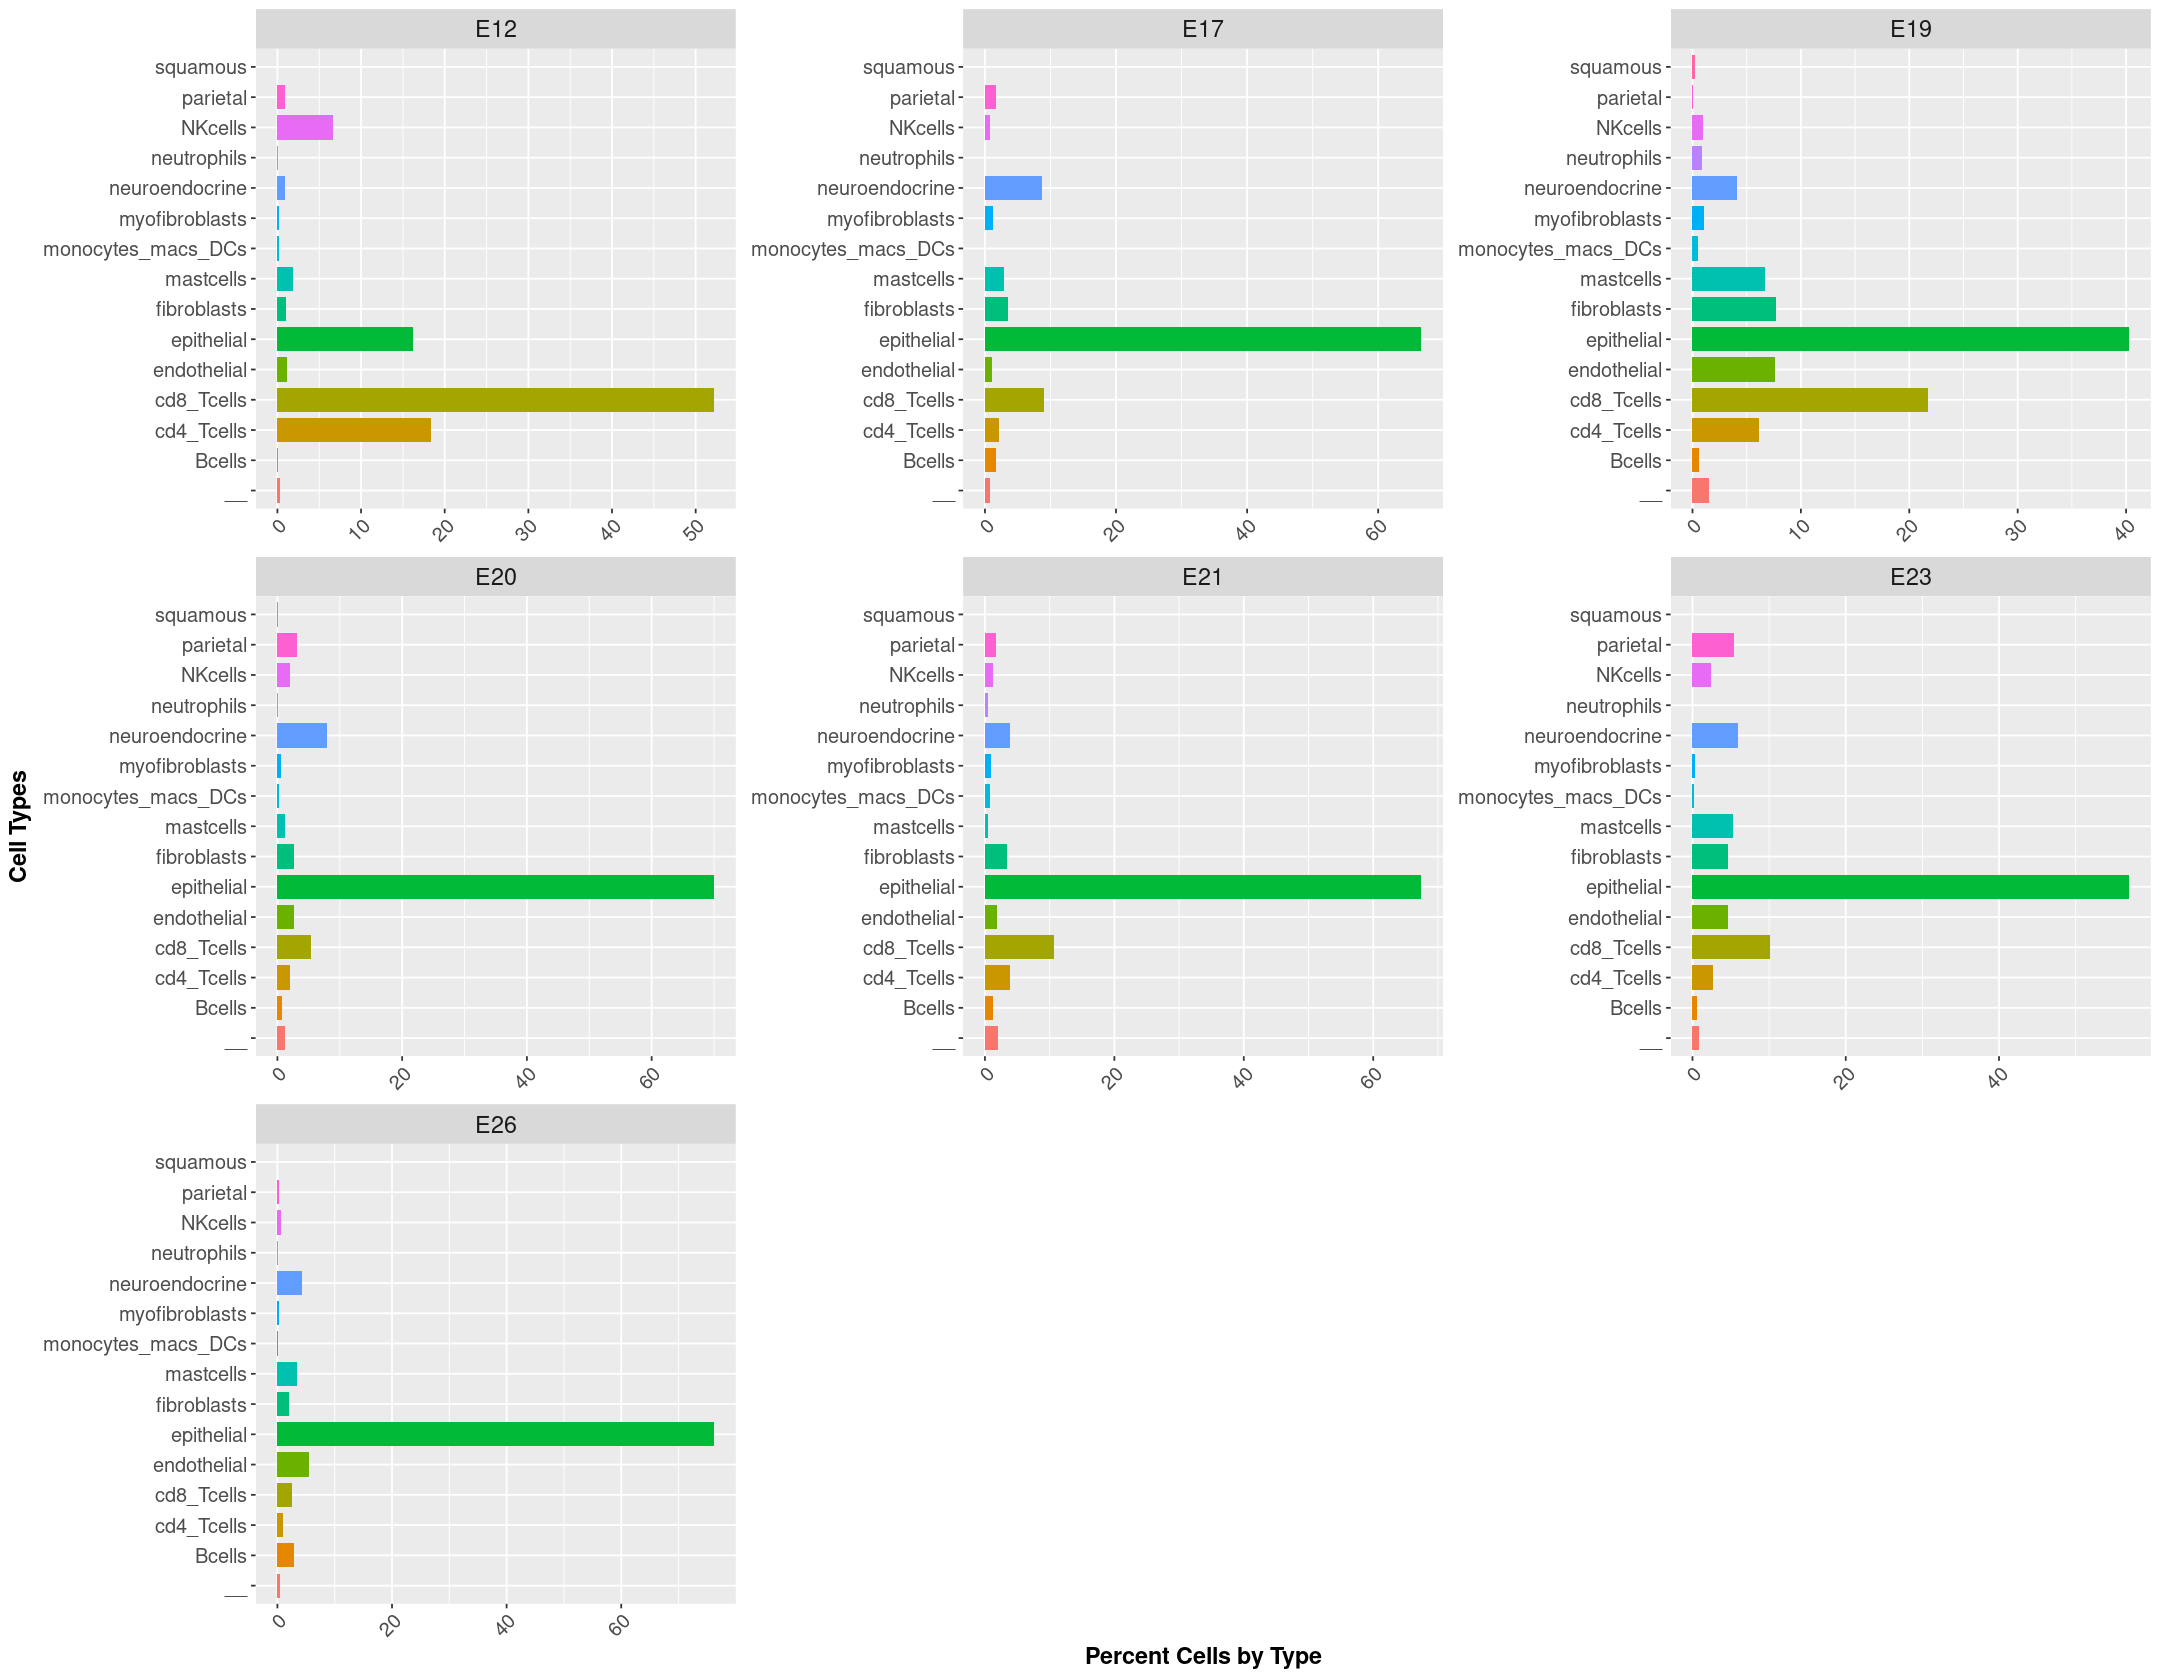

In [32]:

options(repr.plot.width=18, repr.plot.height=14)

subDat <- dat %>% dplyr::filter( (diagnosis == 'NS'))

cellcnts <- data.frame(table(subDat[,c('patient','coarse_grain_celltypes')]))
normCellCntsByPatient <- cellcnts %>% group_by(patient) %>% mutate(freqSum = sum(Freq)) %>% mutate( percentOfPatient= 100* (Freq / freqSum) )
head(normCellCntsByPatient)

ggplot(data = normCellCntsByPatient) +
    geom_bar(mapping = aes(x=percentOfPatient, y=coarse_grain_celltypes, fill=coarse_grain_celltypes),  width=0.8, stat="identity") +
    facet_wrap(~patient,scales = "free") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1.0)) + 
    xlab('Percent Cells by Type') + ylab('Cell Types') +
    theme(axis.text=element_text(size=12),
          axis.title=element_text(size=14,face="bold"),
          strip.text.x = element_text(size = 14),
          legend.position="none")
      


In [23]:
names(table(normCellCntsByPatient$coarse_grain_celltypes))

[1] "__"                 "Bcells"             "cd4_Tcells"        
 [4] "cd8_Tcells"         "endothelial"        "epithelial"        
 [7] "fibroblasts"        "mastcells"          "monocytes_macs_DCs"
[10] "myofibroblasts"     "neuroendocrine"     "neutrophils"       
[13] "NKcells"            "parietal"           "squamous"

In [24]:
normCellCntsByPatient %>% group_by(patient) %>% summarise(sum(percentOfPatient))

patient,sum(percentOfPatient)
<fct>,<dbl>
E07,100
E08,100
E12,100
E14,100
E17,100
E19,100
E20,100
E21,100
E23,100


In [25]:
library(tidyr)


subDat <- dat #%>% dplyr::filter( (diagnosis == 'NE'))

cellcnts <- data.frame(table(subDat[,c('patient','coarse_grain_celltypes')]))
normCellCntsByPatient <- cellcnts %>% group_by(patient) %>% mutate(freqSum = sum(Freq)) %>% mutate( percentOfPatient= 100* (Freq / freqSum) )

dx <- normCellCntsByPatient %>% select(patient, coarse_grain_celltypes, percentOfPatient) 
cellPercTable <- pivot_wider(dx, names_from = patient, values_from = percentOfPatient)
cellPercMatrix <- as.matrix(cellPercTable[, -1])
rownames(cellPercMatrix) <- as.character(cellPercTable[,'coarse_grain_celltypes'] %>% pull())


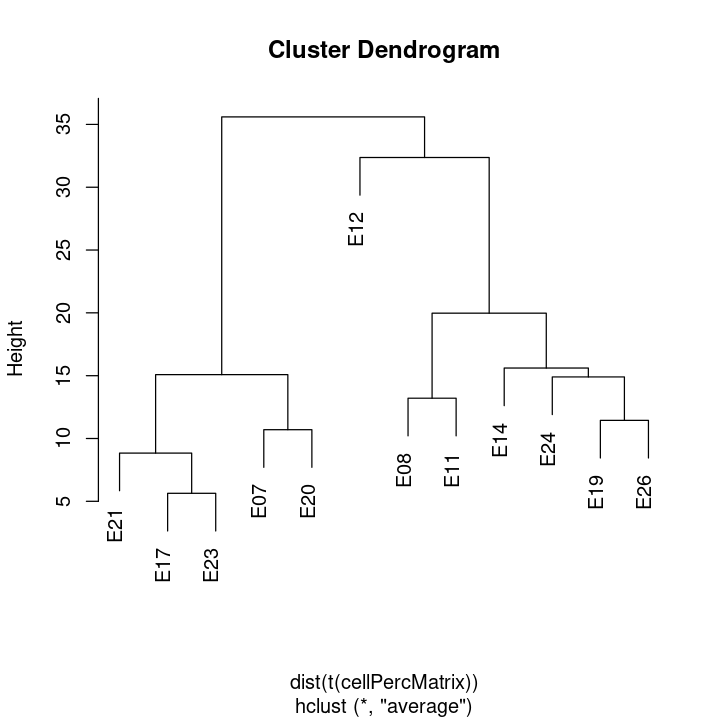

In [26]:
options(repr.plot.width=6, repr.plot.height=6)
plot(hclust(dist(t(cellPercMatrix)), method="average"))
#plot(mydata.hclust,labels=mydata$Company,main='Default from hclust')
#plot(mydata.hclust,hang=-1, labels=mydata$Company,main='Default from hclust')


In [27]:
kc<-kmeans((cellPercMatrix),3)
kc

K-means clustering with 3 clusters of sizes 3, 1, 11

Cluster means:
        E07       E08       E11       E12       E14       E17       E19
1  3.368519 11.010278  9.269217 18.623947 10.027445  5.900673 12.789200
2 67.947371 38.981128 48.256261 20.283380 29.591960 61.832820 27.383156
3  1.995188  2.544367  2.176008  2.167707  3.665973  1.860469  3.113568
        E20       E21       E23       E24       E26
1  3.708975  5.930803  6.210531  9.509374 13.878219
2 72.170127 55.916553 60.349462 36.218588 32.358196
3  1.518450  2.390095  1.910813  3.204845  2.364286

Clustering vector:
                __             Bcells         cd4_Tcells         cd8_Tcells 
                 3                  3                  1                  1 
       endothelial         epithelial        fibroblasts          mastcells 
                 1                  2                  3                  3 
monocytes_macs_DCs     myofibroblasts     neuroendocrine        neutrophils 
                 3            

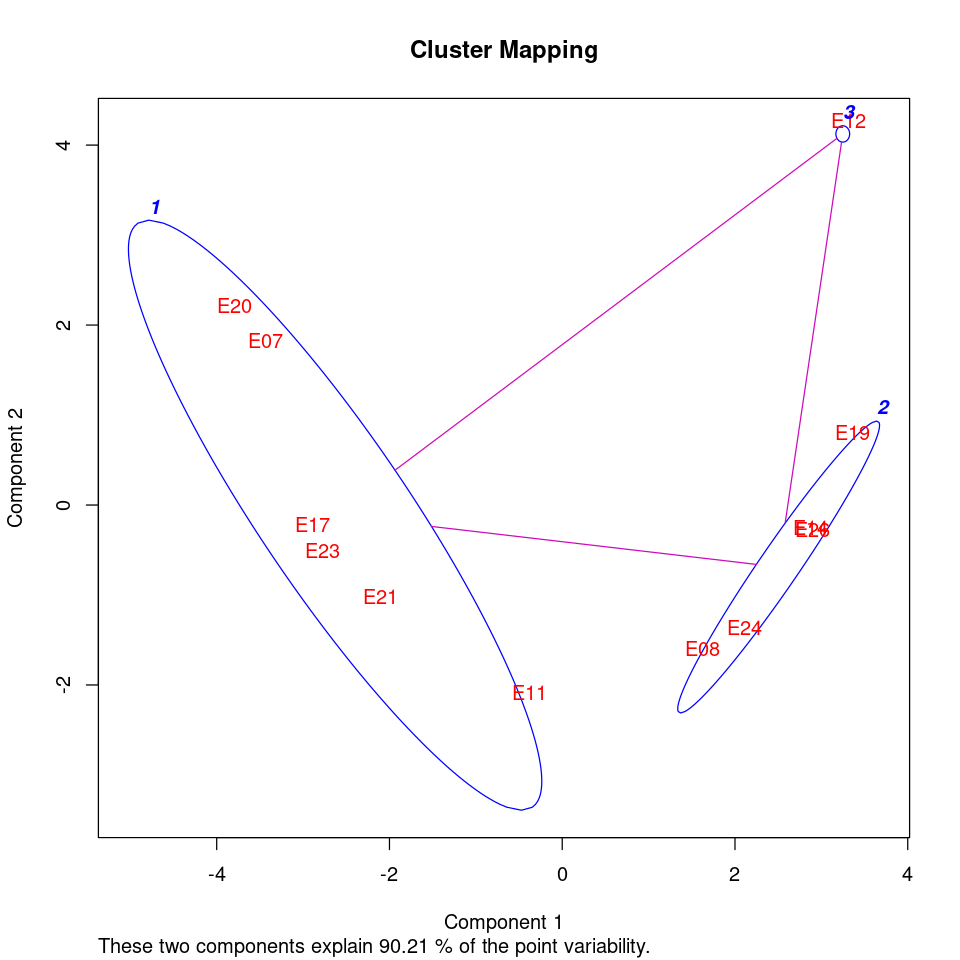

In [34]:
library(cluster)
options(repr.plot.width=8, repr.plot.height=8)
pamvshortset <- pam( dist(t(cellPercMatrix)), 3, diss = FALSE)
clusplot(pamvshortset, shade = FALSE, labels=2, col.clus="blue", col.p="red", span=FALSE, main="Cluster Mapping", cex=0)

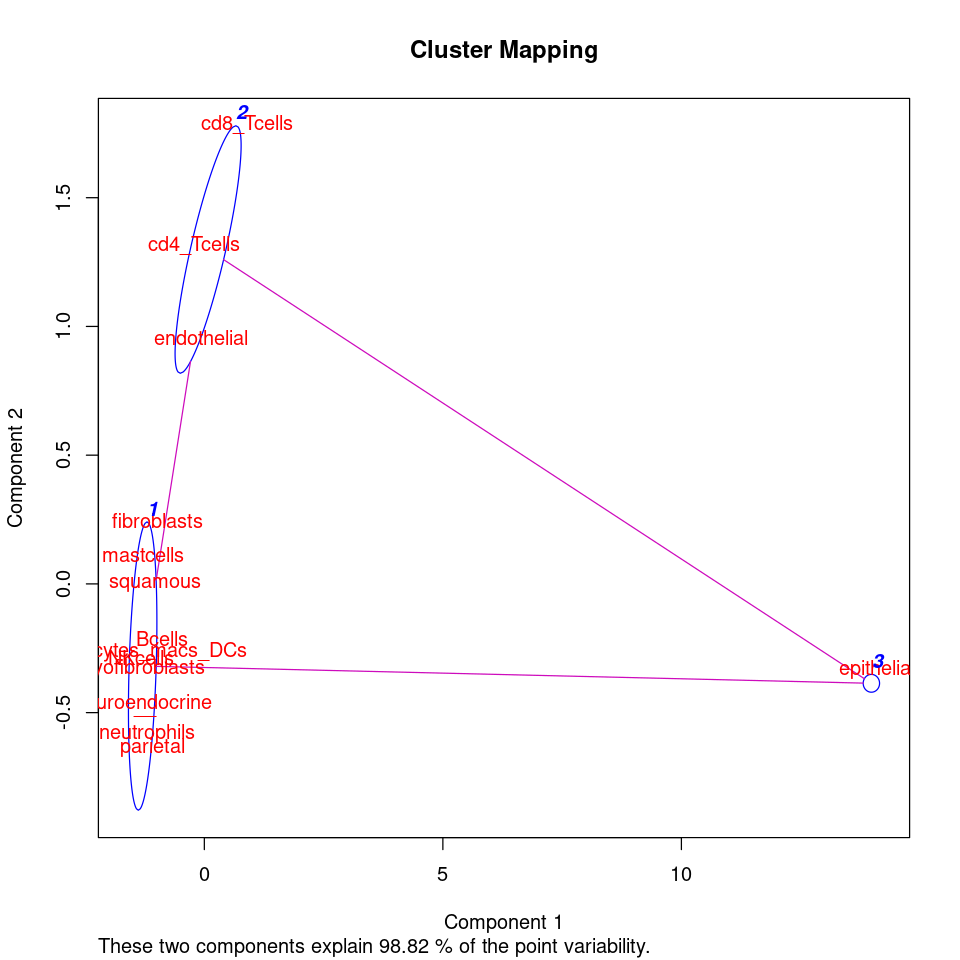

In [35]:
options(repr.plot.width=8, repr.plot.height=8)
pamvshortset <- pam( dist((cellPercMatrix)), 3, diss = FALSE)
clusplot(pamvshortset, shade = FALSE, labels=2, col.clus="blue", col.p="red", span=FALSE, main="Cluster Mapping", cex=0)